<a href="https://colab.research.google.com/github/thornish/Python_Project2/blob/main/Python_Project2_NT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
df = df.replace(['?'],'Unknown')

#Replacing missing values with Unkown as these values cannot be entirely dropped from the data

In [ ]:
#Checking to see if there are any null values
df.isnull().sum()

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
#Instead of dropping columns i am creating a new dataset DF1 that holds the columns that i need for the analysis as i thought these are the factors 
#that might be holding critical information regarding the patient and their medical conditions
df1 = df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'A1Cresult','insulin',
       'change', 'diabetesMed', 'readmitted']]


In [19]:
df1.describe()

,encounter_id,patient_nbr,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566
std,1.026403e+08,3.869636e+07,1.445403,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000
50%,1.523890e+08,4.550514e+07,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,2.302709e+08,8.754595e+07,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000


In [ ]:
df1

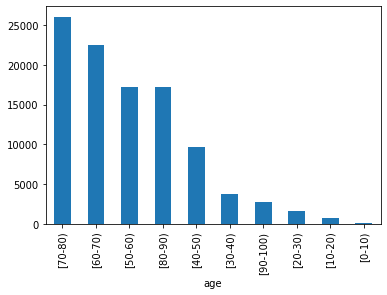

In [7]:
#Acquiring the statsitics between Age and Number of emergencies
df1.groupby(['age'])['number_emergency'].count().sort_values(ascending = False).plot(kind = "bar")
# Age group between [70-80] have the highest number of emergencies where as [0-10] have the lowest 

In [8]:
#Acquiring the statsitics between Age and Time in hospital
df1.groupby(['age'])['time_in_hospital'].mean().sort_values(ascending = False)
#Age group [80-90] had the highest time in hospital while [0-10] had the least

age
[80-90)     4.808629
[90-100)    4.755818
[70-80)     4.590878
[60-70)     4.382244
[50-60)     4.125753
[40-50)     4.039649
[30-40)     3.799735
[20-30)     3.564876
[10-20)     3.191027
[0-10)      2.546584
Name: time_in_hospital, dtype: float64

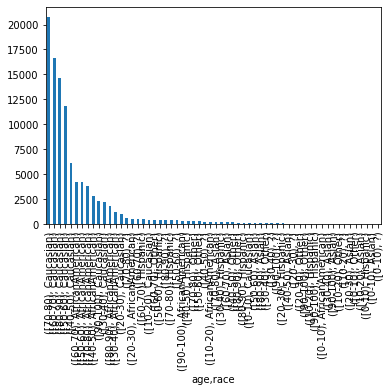

In [ ]:
df1.groupby(['age','race'])['readmitted'].count().sort_values(ascending= False).plot(kind = "bar")
#looks like Race and Age also plays a role in number of readmitted patients

In [9]:
df1.groupby(['number_emergency','readmitted','age','race'])['medical_specialty'].count().sort_values(ascending= False)
#Statistics for the above column data, lesse the no of emergencies, and higher age group from caucasian nationality were readmitted more

number_emergency  readmitted  age       race           
0                 NO          [70-80)   Caucasian          9924
                              [60-70)   Caucasian          8390
                  >30         [70-80)   Caucasian          6836
                  NO          [80-90)   Caucasian          6824
                              [50-60)   Caucasian          6064
                                                           ... 
6                 >30         [50-60)   AfricanAmerican       1
1                 NO          [20-30)   Unknown               1
6                 >30         [90-100)  Caucasian             1
                  NO          [10-20)   Caucasian             1
76                >30         [60-70)   Caucasian             1
Name: medical_specialty, Length: 723, dtype: int64

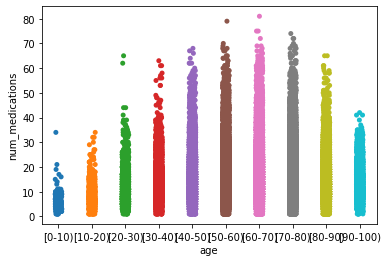

In [15]:
sns.stripplot(x="age", y="num_medications", data = df1)

In [ ]:
sns.pairplot(df1)

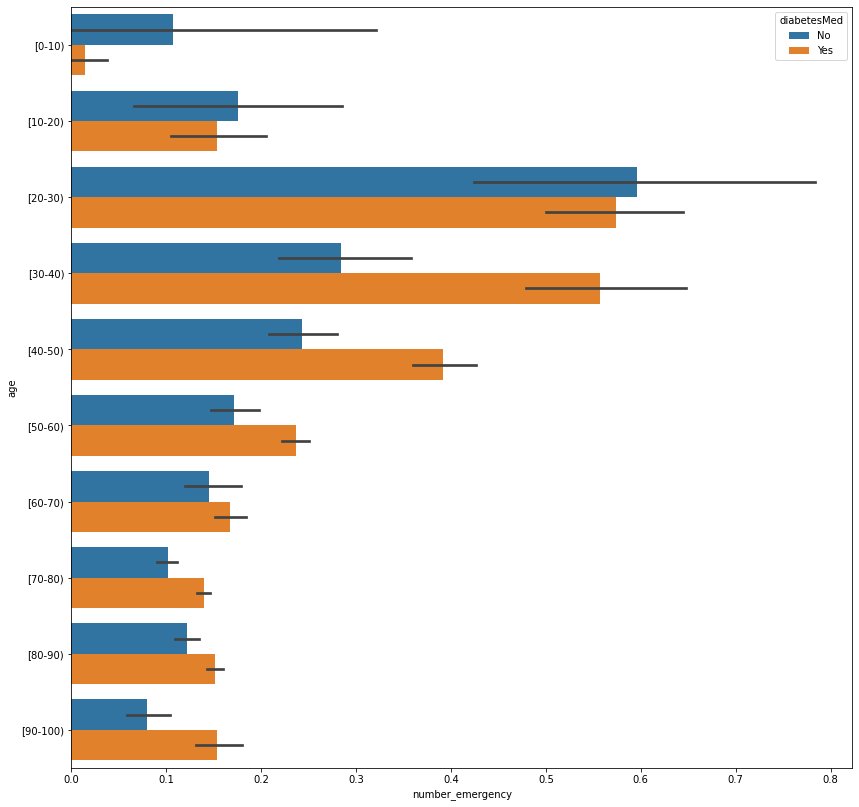

In [14]:
plot.figure(figsize=[14,14])
sns.barplot(x='number_emergency', y='age', hue ='diabetesMed', data = df1)
#Suprising to see that age group [20-30] and [30-40] under Diabetes Meds have had higest number of emergensies

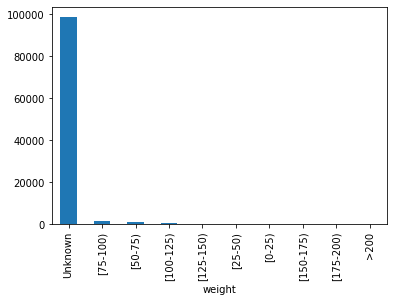

In [18]:
#We cannot conlude entirely that Weight and no of emergiencies corelate as we have missing data that constitutes to the majority of the portion.
# But with the data we have we it can be referenced that higher the weight, higher the no of emergencies.
df2 = df1.groupby(['weight'])['number_emergency'].count().sort_values(ascending= False).plot(kind = "bar")

In [25]:
df1.groupby(['num_medications'])['number_emergency'].mean().sort_values(ascending = False)

num_medications
37    0.279863
27    0.254190
24    0.254149
25    0.253708
23    0.246496
        ...   
72    0.000000
74    0.000000
75    0.000000
79    0.000000
81    0.000000
Name: number_emergency, Length: 75, dtype: float64

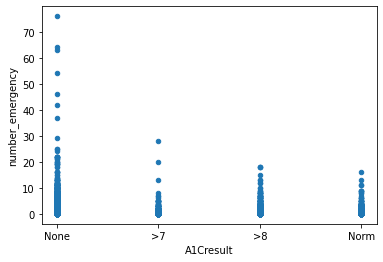

In [29]:
df1.plot(kind ="scatter", x ='A1Cresult', y='number_emergency')

I have entirely considered the columns other than medications to perform my analysis. 
Age, race, weight and patient related information and underlying medical conditions are corelative and some or the other way constitute to the fact that they play a major role in on'e health. With that said, it is also not necessary that higher the age, higher the emergencies, where we saw that age groups bet 20-50 using diabetes medication have higher number of emergencies. Age group 70-80 have higher number of medications and higher no of emergencies